# Probability Distributions

Probability forms the basis for many statistical tools and data analysis techniques. It quantifies the likelihood of an event happening on a scale ranging from 0 (the event never occurs) to 1 (the event always occurs). In data analysis, variables within a dataset's columns can be treated as random variables, meaning they exhibit variability due to chance.

A probability distribution characterizes how a random variable is spread across its possible values. It provides insights into which values the random variable is more likely to assume and which values have lower probabilities.

Statistics offers a diverse set of precisely defined probability distributions, each having distinct shapes and suitability for modeling various types of random events. In this lesson, we will delve into some commonly used probability distributions and explore how to leverage them in R for data analysis.

# Distribution Function Basics and The Uniform Distribution

The uniform distribution is a probability distribution in which every value within a specific range has an equal likelihood of occurring, while values outside that range never occur. When visualized through a density plot, the uniform distribution appears flat, as no value is more likely or denser than another.

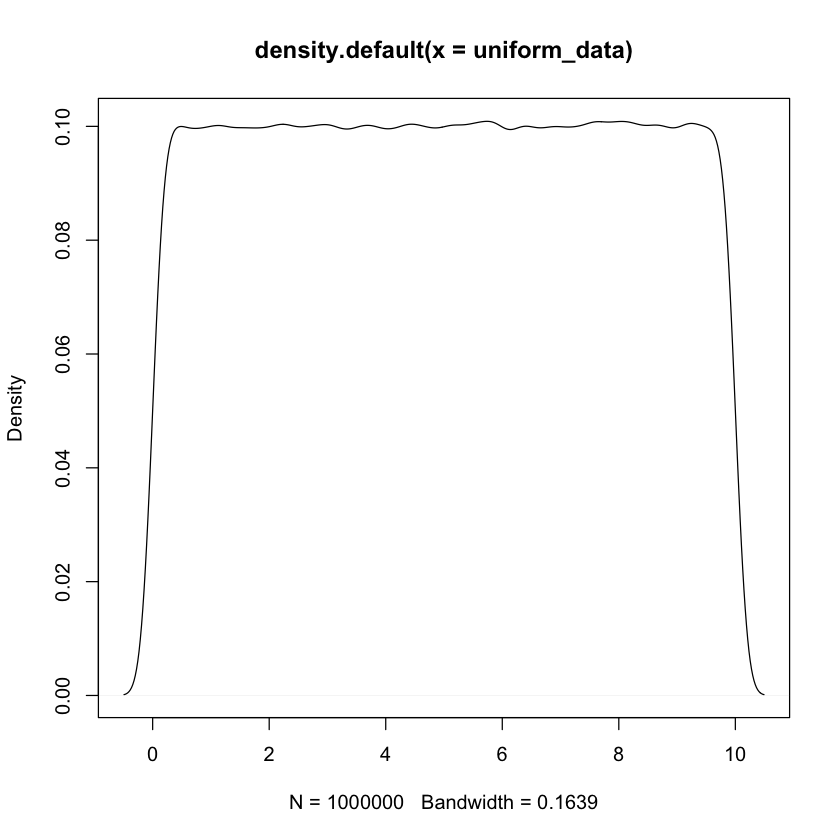

In [1]:
# Suppressing Warnings
# To avoid displaying warnings during code execution, we can set the warning option to -1.
options(warn=-1)

# Generating Data from a Uniform Distribution
# Let's create a dataset of one million random numbers following a uniform distribution between 0 and 10.
uniform_data <- runif(1000000,0,10)   

# Creating a Density Plot
# We'll now generate a density plot to visualize the distribution of the "uniform_data" we just created.

plot(density(uniform_data ))         

*Please note that the plot presented above provides an approximation of the underlying distribution since it is based on a sample of observations, and as a result, it may not be perfectly flat.*

In the provided code, we have generated one million data points from a uniform distribution covering the range from 0 to 10. The density plot illustrates that the density of our uniform data is uniformly distributed, indicating that each value within the range has an equal probability of occurring. The area under the probability density curve remains constant at 1.

In R, every probability distribution is associated with four function prefixes: "r", "p", "q", and "d". When working with probability distributions in R, your function calls will start with one of these prefixes, followed by the name of the specific distribution you are working with. For example, the uniform distribution in R is denoted as "unif", and the corresponding available functions for the uniform distribution are runif(), punif(), qunif(), and dunif(). Let's explore each of these prefixes in detail.

The "r" prefix is utilized to generate random numbers from the designated distribution. As we have previously seen in the lessons, we have used the runif() function to generate random numbers. The arguments provided when generating random numbers depend on the type of distribution being used. In the case of the uniform distribution, we need to specify the number of random numbers we want to generate and the range of the distribution.

In [2]:
more_random_data <- runif(n=10000,   # Generate 10,000 numbers
                          min=0,     # In the range 0
                          max=10)    # To 10

The letter "p" is utilized to represent the probability of an observation drawn from a distribution being below a specific value. This concept is commonly known as the cumulative distribution function. In simpler terms, "p" provides the area under the density curve of the distribution to the left of a particular value on the x-axis. For instance, in the uniform distribution described earlier, there is a 25% probability that an observation will fall within the range of 0 to 2.5, and a 75% probability that it will fall within the range of 2.5 to 10. This can be verified using the punif() function.

In [3]:
punif(q = 2.5,      # Cutoff value (quantile) to check
      min=0,                 
      max=10)

[1] 0.25

The prefix "q" serves as the opposite of the prefix "p" in its functionality. It calculates the cutoff value (quantile) corresponding to a specified probability. For example, if we need to determine the cutoff value at which there is a 40% probability of drawing an observation below that value, we can utilize the "q" prefix.

In [4]:
qunif(p = 0.4,      # Probability cutoff
      min = 0, 
      max = 10)

[1] 4

Ultimately, the "d" prefix provides the density (height of the density curve) at a specific point. In our plot, which depicts randomly generated uniform data, the density remained constant at 0.1 across the entire range of 0 to 10.

In [5]:
dunif(x = 0,           # x value at which to check density
      min = 0,
      max = 10)

dunif(5, 0, 10)        # Check some more densities
dunif(10, 0, 10)
dunif(11, 0, 10)    # a value outside the distribution's range has 0 probability

[1] 0.1

[1] 0.1

[1] 0.1

[1] 0

# Generating Random Numbers and Setting The Seed

Whenever you require generating random real numbers uniformly within a specified range with equal probability, you can utilize the runif() function. The uniform distribution ensures that the values generated can take on any real number within the given range, resulting in decimal numbers. To obtain integers instead of decimals, you can apply the floor() function to round down the generated decimal values.

In [6]:
random_ints <- floor(runif(100000,1,11))    # Generate random data and round down

table(random_ints)                          # Check counts

random_ints
    1     2     3     4     5     6     7     8     9    10 
 9942 10088 10101  9911 10042  9887  9923  9964 10098 10044 

The utilization of runif() is not mandatory for generating integers. Instead, you can opt for the sample() function to extract a specified number of samples from a vector.

In [7]:
random_ints2 <- sample(x = 1:10,             # Vector to sample from
                       size = 100000,        # Number of samples
                       replace = TRUE)       # Sample with replacement?*

table(random_ints2)                          # Check counts

random_ints2
    1     2     3     4     5     6     7     8     9    10 
10158  9829  9996 10060  9994  9830 10029 10120  9989  9995 

*Note: When sampling with replacement, you draw a value and then return it to the set for possible selection again instead of removing it.*

When working with random data and functions that incorporate randomization, your outcomes may vary from one execution to another. However, in many cases, having different results each time you run a function is undesirable. This variability can cause issues when you need someone else, like a colleague, to reproduce your exact results. To ensure consistent results, even with randomness, you can set the seed value of the random number generator using the set.seed() function before running the desired function. By doing so, you will obtain the same outcomes each time you use the randomization-based function.

In [8]:
set.seed(12)      # Set seed to arbitrary value

runif(5,1,5)    # Generate some random numbers

set.seed(12)      # Reset seed to the same value

runif(5,1,5)    # Generate more random numbers

[1] 1.277444 4.271101 4.770487 2.077528 1.677392

[1] 1.277444 4.271101 4.770487 2.077528 1.677392

Observe that we produced identical numbers using both runif() calls because we initialized the same seed before each call. Without setting the seed, the generated numbers would have been different. This demonstrates that these random numbers are not genuinely random but instead termed "[pseudorandom](https://en.wikipedia.org/wiki/Pseudorandomness)".

# The Normal Distribution

The normal distribution, also known as the Gaussian distribution, is a continuous probability distribution with a symmetric bell-shaped curve. It is uniquely characterized by its center (mean) and spread (standard deviation). In this distribution, the majority of observations cluster around the mean, which is located at the exact center. Approximately 68% of the data falls within 1 standard deviation of the mean, 95% within 2 standard deviations, and 99.7% within 3 standard deviations.

The normal distribution holds significant importance in statistics, as it closely models numerous real-world phenomena such as IQ test scores and human heights. This makes it a commonly used distribution to represent random variables. Moreover, many standard statistical tests assume normality in the data.

In R, the normal distribution is referred to as "norm," and there are specific functions designed for working with it: rnorm(), pnorm(), qnorm(), and dnorm().

In [9]:
# Creating Normally Distributed Data
# We begin by generating a dataset with one million data points following a normal distribution. 
# The data has a mean (μ) of 0 and a standard deviation (σ) of 1.
normally_distributed <- rnorm(1000000,     
                              mean = 0,    
                              sd = 1) 

### Probability Calculation - Values less than -1
Next, we calculate the probability of observing a value less than -1 in our generated dataset. The cumulative distribution function (CDF) is used to determine this probability, given the mean (μ) of 0 and the standard deviation (σ) of 1.

In [10]:
prob_under_minus1 <- pnorm(q=-1,        
                     mean=0,
                     sd=1)

### Probability Calculation - Values greater than 1
We also compute the probability of observing a value greater than 1 in the dataset using the complement of the cumulative distribution function (1 - CDF) with the same mean (μ) and standard deviation (σ) as before.

In [11]:
prob_over_1 <-  1-pnorm(q=1,            
                     mean=0,
                     sd=1)

### Probability Calculation - Values between -1 and 1
To find the probability of values falling between -1 and 1 in the dataset, we subtract the probabilities of values less than -1 and greater than 1 from 1.

In [12]:
between_prob <- 1-(prob_under_minus1+prob_over_1)  

Finally, we display the calculated probabilities:

In [13]:
prob_under_minus1
prob_over_1
between_prob

[1] 0.1586553

[1] 0.1586553

[1] 0.6826895

These calculations provide insights into the distribution and likelihood of certain values within the generated normally distributed dataset.

The results indicate that approximately 16% of the data generated from a normal distribution with a mean of 0 and a standard deviation of 1 falls below -1, another 16% lies above 1, and 68% falls within the range of -1 and 1. These percentages align with the 68-95-99.7 rule, a common empirical rule for normal distributions. Now, we will visualize the randomly generated normal data using ggplot2, a plotting package that enables more sophisticated visualizations. Please focus on the plot's overall presentation rather than the specific code details.

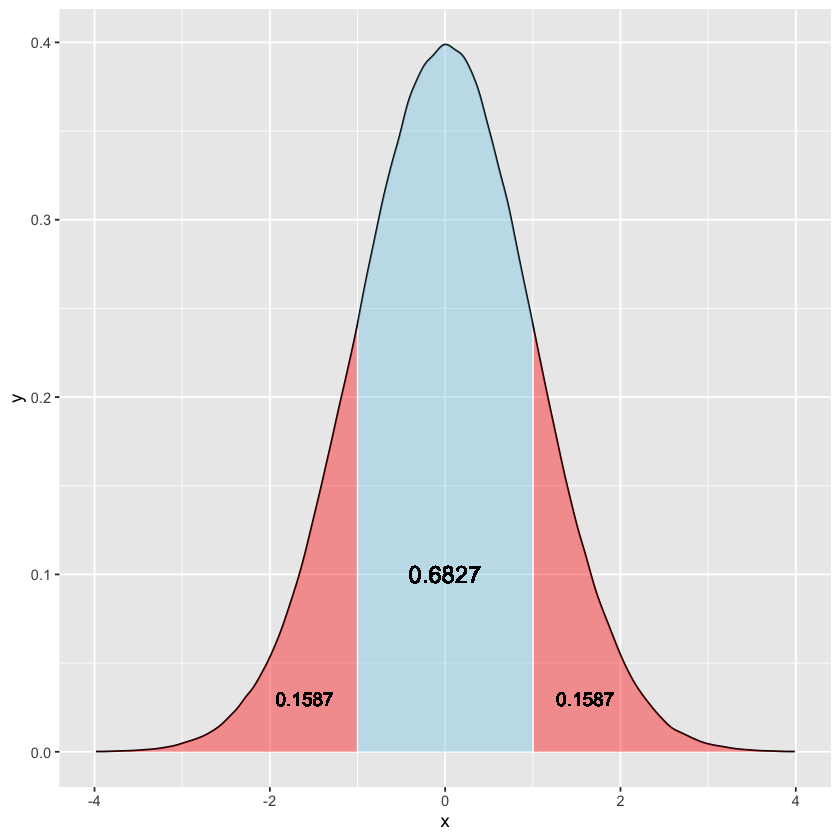

In [14]:
library(ggplot2)

# Plot the density curve with the cutoff areas
norm_frame = with(density(normally_distributed),  # Create data frame density values
                  data.frame(x,y))  


myplot <- ggplot(data = norm_frame, aes(x = x, y = y)) +   # Create the plot
       geom_line() +
       geom_ribbon(data=subset(norm_frame,x < -1),
                   aes(ymax=y, ymin=0),
                   fill="red", 
                   alpha=0.4) +
       geom_ribbon(data=subset(norm_frame,x > 1),
                   aes(ymax=y, ymin=0),
                   fill="red", 
                   alpha=0.4) +
       geom_ribbon(data=subset(norm_frame,x > -1 & x < 1),
                   aes(ymax=y, ymin=0),
                   fill="skyblue", 
                   alpha=0.4) +
       geom_text(x=-1.6,y=0.03,label=round(prob_under_minus1,4),size=4) +
       geom_text(x=1.6,y=0.03,label=round(prob_under_minus1,4),size=4) +
       geom_text(x=0,y=0.1,label=round(1-(prob_under_minus1*2),4),size=5) +
       xlim(-4,4)

myplot

The above plot illustrates the characteristic bell shape of the normal distribution, displaying the areas above and below one standard deviation from the mean. It also highlights the area within one standard deviation of the mean.

Calculating quantiles of the normal distribution is a standard procedure in statistical analysis. To check quantiles, you can use the qnorm() function.

In [15]:
qnorm(p = 0.025)      # Find the quantile at the 2.5% cutoff
qnorm(p = 0.975)      # Find the quantile at the 97.5% cutoff

[1] -1.959964

[1] 1.959964

The provided quantile output validates that approximately 5% of the data deviates more than 2 standard deviations from the mean.

*Please note that the default values for the normal distribution functions are a mean of 0 and a standard deviation of 1.*

# The Binomial Distribution

The binomial distribution is a discrete probability distribution that represents the outcomes of a specific number of random trials for an experiment or event with a known probability of success. It is characterized by two parameters: the probability of success in a single trial and the total number of trials. Each individual trial is referred to as a Bernoulli random trial.

By employing the binomial distribution, we can determine the likelihood of achieving a particular number of successes in a series of n trials for the given experiment. For instance, we can use a binomial distribution to model the scenario of flipping a fair coin ten times, where the number of trials is set to 10, and the probability of getting a head is set to 0.5. By using this distribution, we can calculate the probabilities of obtaining zero heads, one head, two heads, and so on.

In R, the binomial distribution is represented by the nickname "binom," and there are four functions to work with it: rbinom(), pbinom(), qbinom(), and dbinom(). Let's generate and analyze some data using the binomial distribution.

fair_coin_flips
     0      1      2      3      4      5      6      7      8      9     10 
   973   9854  43736 117091 204867 246726 204975 117294  43723   9786    975 

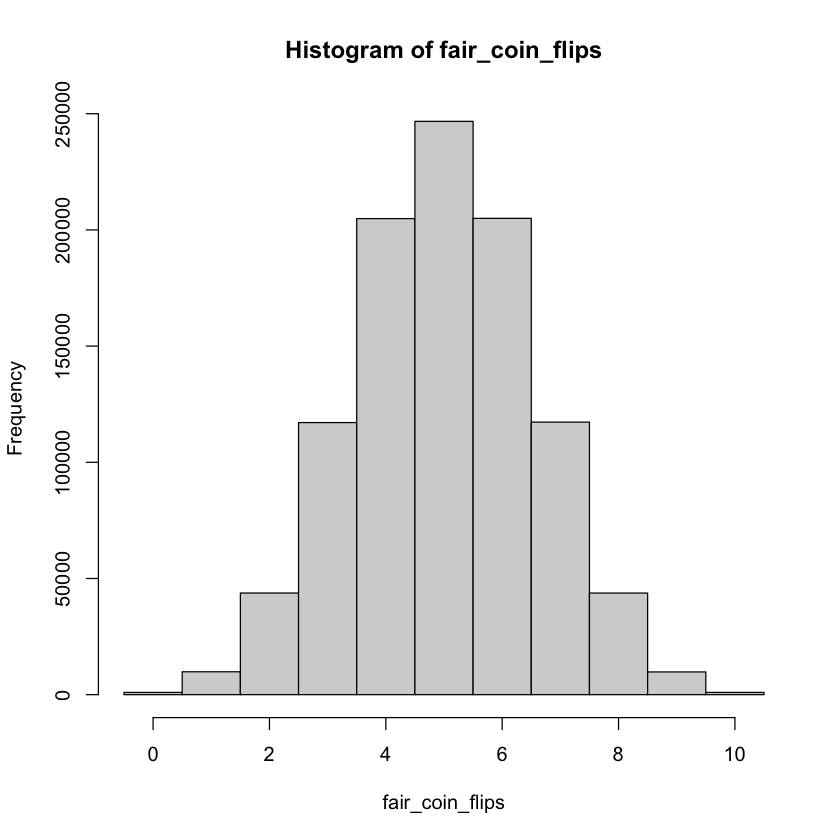

In [16]:
fair_coin_flips   <- rbinom(1000000,    # Generate data from the binomial distribution
                           size = 10,   # With 10 trials
                           prob = 0.5)  # And success probability 0.5

table(fair_coin_flips)                # Check the counts

hist(fair_coin_flips, breaks=seq(-0.5,10.5,1))   # Plot the results as a histogram

Keep in mind that due to its discrete nature, the binomial distribution solely assumes integer values. Consequently, we can represent binomial data using a table and visualize its distribution through a histogram. When the probability of success is 50%, the histogram displays a symmetric pattern, with the most probable outcomes centered around the mean. This symmetry bears a resemblance to the normal distribution. However, modifying the success probability results in an asymmetrical distribution.

biased_coin_flips
     1      2      3      4      5      6      7      8      9     10 
     1     60    756   5395  26336  88095 201120 302086 269178 106973 

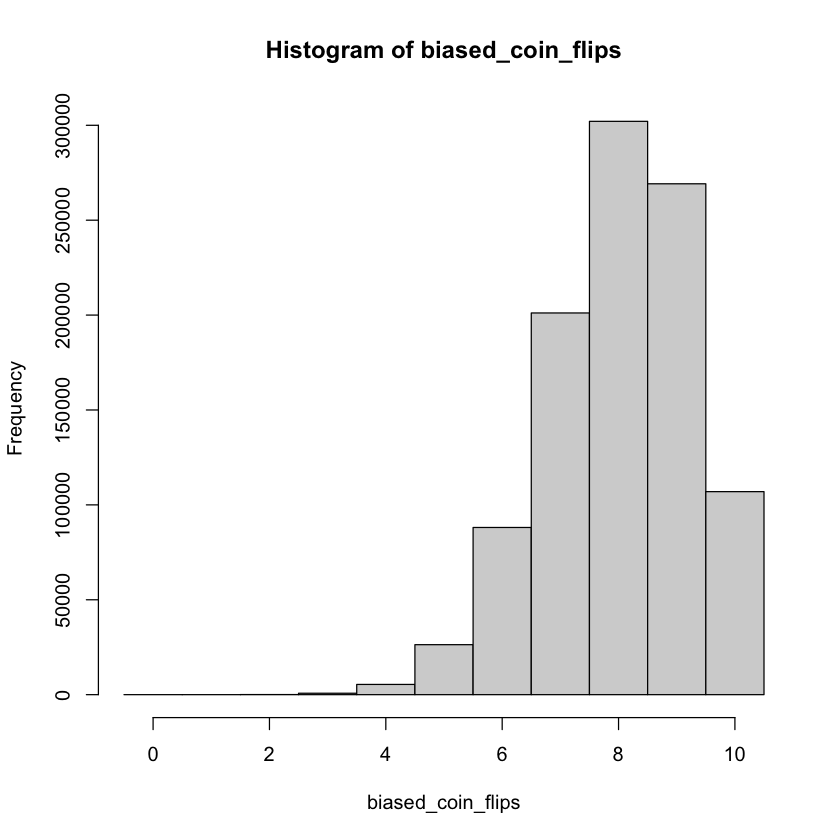

In [17]:
set.seed(9)
biased_coin_flips   <- rbinom(1000000,  # Generate data from the binomial distribution
                           size = 10,   # With 10 trials
                           prob = 0.8)  # And success probability 0.8

table(biased_coin_flips)                # Check the counts

hist(biased_coin_flips, breaks=seq(-0.5,10.5,1))   # Plot the results as a histogram

By using the pbinom() function, we can determine the probability of attaining a specific number of successes within a given range.

In [18]:
# Check the chances of achieving 5 successes or less
pbinom(q=5,           
      size=10,
      prob=0.8)

# Check the chances of achieving 9 successes or more
pbinom(q=8,           
      size=10,
      prob=0.8, 
      lower.tail = FALSE)    # Check the upper tail

[1] 0.0327935

[1] 0.3758096

The function dbinom() calculates the probability density of the binomial distribution for a given value of x. As the binomial distribution is discrete, this represents the probability of achieving a particular number of successes.

In [19]:
# Check the probability of 5 successes in 10 flips of a fair coin
dbinom(x=5,             
      size=10,
      prob=0.5)    

# Check the probability of 8 successes in 10 flips of a biased coin
dbinom(x=8,             
      size=10,
      prob=0.8)

[1] 0.2460938

[1] 0.3019899

# The Geometric and Exponential Distributions

The time it takes for an event to occur can be represented by two distributions: the geometric distribution and the exponential distribution. The geometric distribution is discrete and is utilized to model the number of trials needed to achieve a success in repeated experiments with a specific probability of success. On the other hand, the exponential distribution serves as a continuous counterpart to the geometric distribution, representing the amount of time one must wait before an event occurs, given a certain occurrence rate.

In R, the geometric distribution is referred to as "geom". Let's apply the geom functions to model the number of coin flips needed to get a success (heads) when flipping a fair coin.

flips_till_heads
     1      2      3      4      5      6      7      8      9     10     11 
500135 250046 125003  62229  31088  15649   7976   3869   2044    976    481 
    12     13     14     15     16     17     18     19     20     22     23 
   256    123     66     28     15      7      4      1      2      1      1 

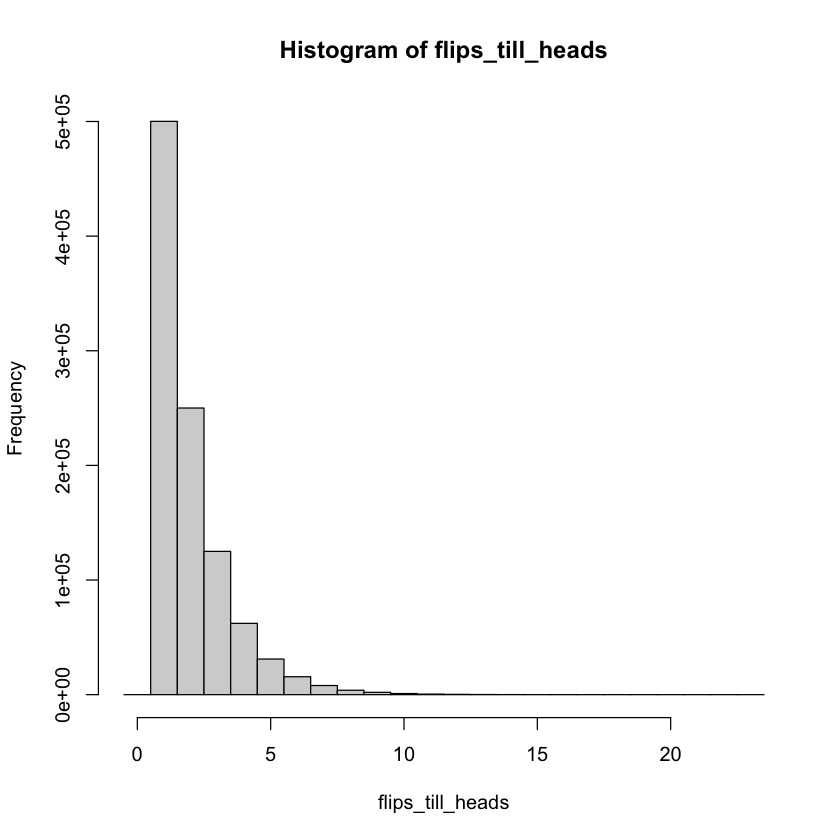

In [20]:
set.seed(12)
flips_till_heads <- rgeom(n=1000000,     # Generate geometric data* 
                          prob=0.5) + 1    

table(flips_till_heads)     # Check counts of results

hist(flips_till_heads, 
     breaks=seq(-0.5,max(flips_till_heads)+0.5))   

*Note: In R, the geom functions model the number of failures until the first success, so adding 1 is necessary to obtain the number of trials until the first success.*

The observed distribution aligns with expectations: obtaining a heads in 1 or 2 flips is highly probable, while requiring more than 5 flips is very unlikely. Among the one million trials generated, the maximum number of flips needed to get a heads was 23.

Now, let's utilize pgeom() to calculate the probability of requiring 6 flips or more to achieve a successful outcome.

In [21]:
pgeom(q=4,             
      prob=0.5, 
      lower.tail = FALSE)    # Check the upper tail

[1] 0.03125

By utilizing dgeom(), you can assess the probability of observing a particular number of failures before encountering a success.

In [22]:
# Check the chances of getting 1 failure and then a success
dgeom(x=1,
     prob=0.5)

[1] 0.25

The exponential distribution in R is referred to as "exp". In previous lessons, we have employed the exponential function using rexp() to create skewed data. Now, we will generate exponential data, determine the probability of waiting more than 1 time unit for a success, and visualize the results through plotting.

In [23]:
exponential_data <- rexp(n=1000000,
                         rate=1)        # Success/arrival rate*

# Get the probability of waiting more than 1 time unit before a success
prob_longer_1 <- pexp(q=1,               
                      rate=1,
                      lower.tail=FALSE)

prob_longer_1

[1] 0.3678794

*Note: The mean arrival time for the exponential distribution is given by 1/rate.*

Now, we will create a density curve to visualize the shape of the generated exponential data.

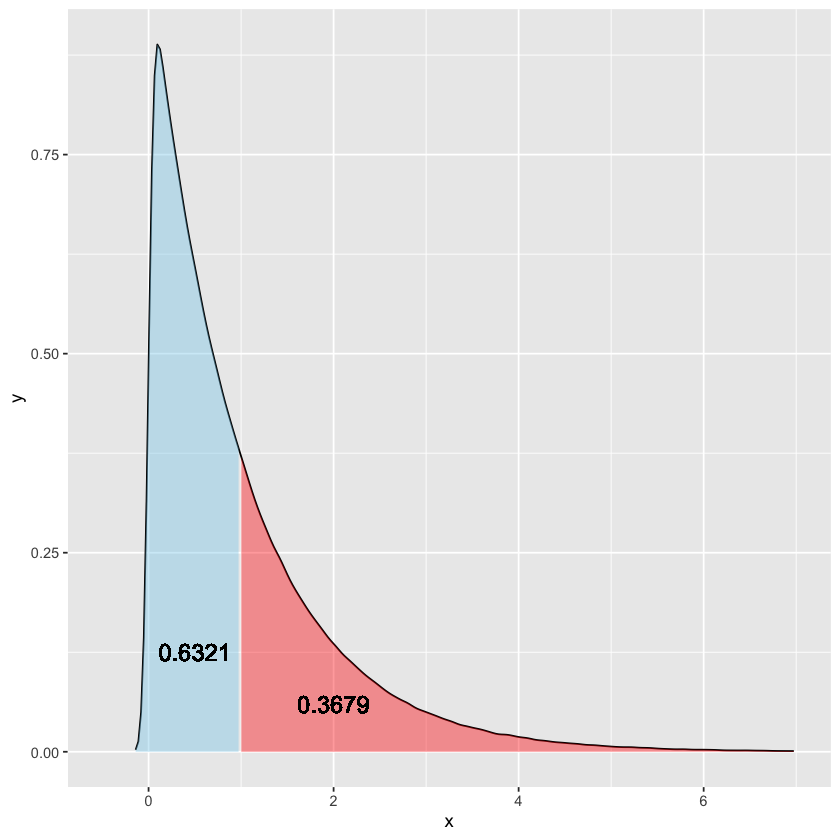

In [24]:
# Plot the density curve of the exponential
exp_frame = with(density(exponential_data),  # Create data frame of x,y density values
                  data.frame(x,y))  

myplot <- ggplot(data = exp_frame, aes(x = x, y = y)) +   # Create the plot
       geom_line() +
       geom_ribbon(data=subset(exp_frame,x > 1),
                   aes(ymax=y, ymin=0),
                   fill="red", 
                   alpha=0.4)+
       geom_ribbon(data=subset(exp_frame,x < 1),
                   aes(ymax=y, ymin=0),
                   fill="skyblue", 
                   alpha=0.4) +
       geom_text(x=2,y=0.06,label=round(prob_longer_1,4), size=5) +
       geom_text(x=0.5,y=0.125,label=round(1-prob_longer_1,4), size=5) +
       xlim(-0.5,7)

myplot

Like the geometric distribution, the exponential distribution also begins with higher values and has a long tail extending to the right, encompassing infrequent occurrences where one may experience significantly longer waiting times than the average for an arrival.

# The Poisson Distribution

The Poisson distribution represents the likelihood of observing a specific number of successes during a given time interval, where the time between successive successes follows an exponential distribution. It finds applications in modeling various scenarios, such as predicting hospital arrivals within an hour or estimating the number of emails one might receive in a week.

In R, the Poisson distribution is denoted by "pois". We will now generate and visualize data from a Poisson distribution with an arrival rate of 1.

arrival_rate_1
     0      1      2      3      4      5      6      7      8      9 
367994 367884 183697  61524  15193   3096    527     70     13      2 

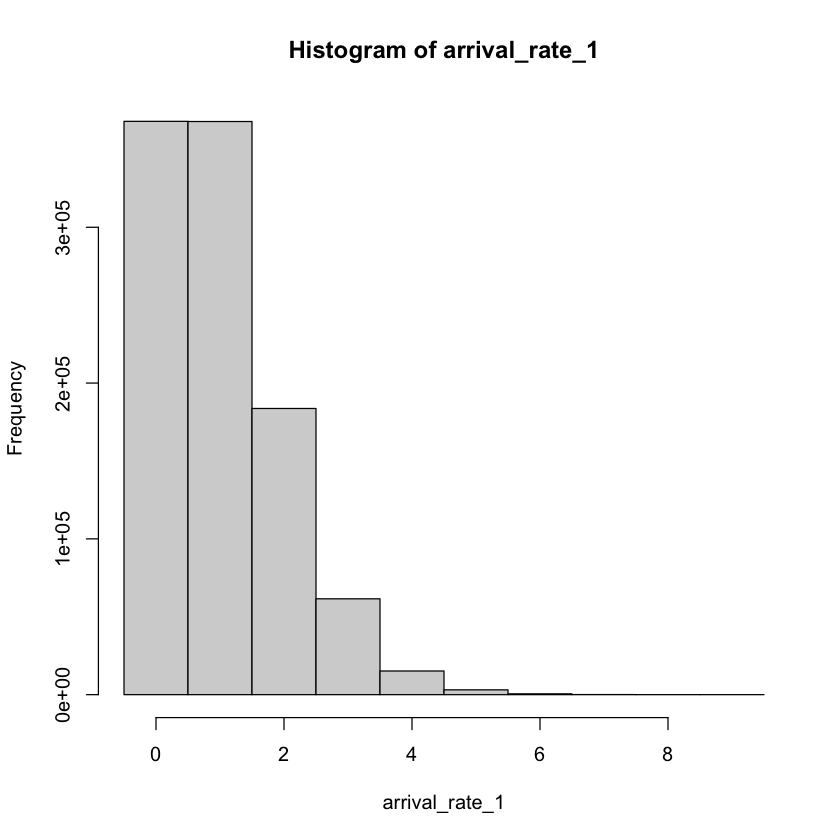

In [25]:
set.seed(12)
arrival_rate_1 <- rpois(n = 1000000,
                      lambda = 1)        # Arrival rate

table(arrival_rate_1)

hist(arrival_rate_1,
     breaks=seq(-0.5,max(arrival_rate_1)+0.5,1))

The histogram illustrates that with less frequent arrivals, it is uncommon to observe more than a couple of arrivals in each time period. However, when the arrival rate increases, it becomes rare to encounter a low number of arrivals, resulting in a more symmetrical distribution.

arrival_rate_10
     0      1      2      3      4      5      6      7      8      9     10 
    49    473   2222   7576  18811  38135  62970  89986 112335 124749 125202 
    11     12     13     14     15     16     17     18     19     20     21 
114003  94613  72881  52293  34696  21709  12811   7147   3818   1952    874 
    22     23     24     25     26     27     28 
   400    175     65     30     12     10      3 

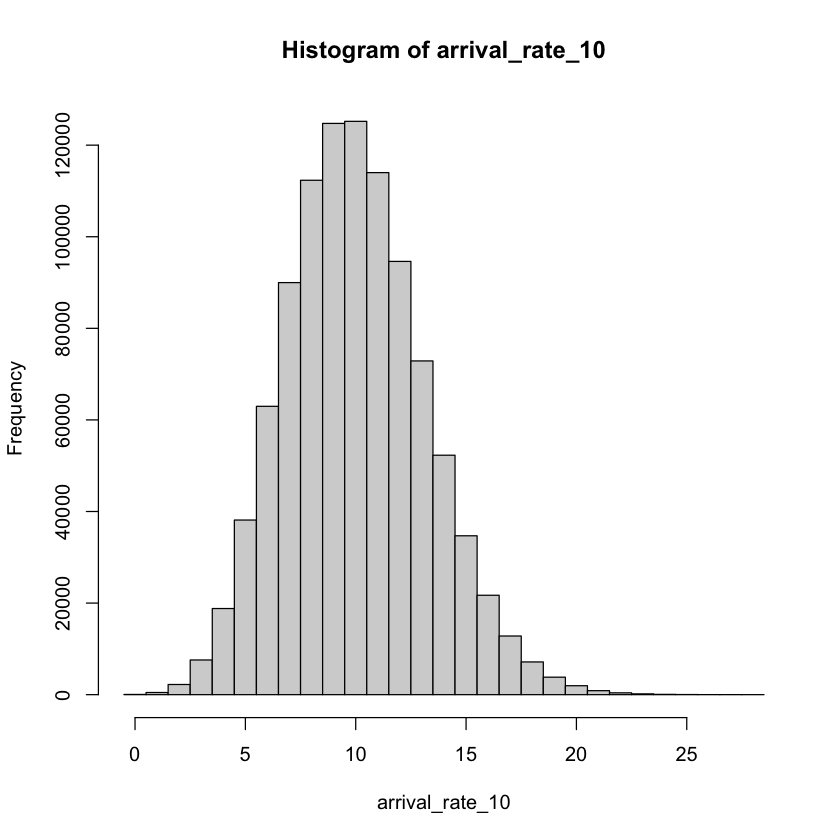

In [26]:
set.seed(12)
arrival_rate_10 <- rpois(n=1000000,
                      lambda=10)    # Arrival rate of 10 per time unit

table(arrival_rate_10)

hist(arrival_rate_10,
     breaks=seq(-0.5,max(arrival_rate_10)+0.5,1))

To assess the likelihood of attaining more or fewer successes than a particular number, we can employ the ppois() function. Additionally, the dpois() function allows us to examine the probability of achieving a specific number of successes.

In [27]:
# check the probability of getting 5 arrivals or less
ppois(q=5,           
      lambda=10)     

# Check the probability of getting exactly 10 arrivals
dpois(x=10,           
      lambda=10)

[1] 0.06708596

[1] 0.12511

# Conclusion

Within R, you can find a plethora of built-in functions tailored to facilitate work with various probability distributions, including numerous ones not covered in this lesson (see [link](https://en.wikibooks.org/wiki/R_Programming/Probability_Distributions) for details). These probability distribution functions play a vital role in generating random data, modeling unpredictable events, and supporting statistical tests and analysis.

# Exercises

To complete the exercises, please fill in the code boxes as per the provided exercise instructions, and then run the code.

### Exercise #1
In basketball, players receive uncontested shots known as free throws when fouled by opposing players under specific circumstances. Skilled shooters often achieve an impressive free throw success rate, making around 90% of their attempts. It's not uncommon for star players to take up to 10 free throws during a game.

To calculate the probability of a 90% free throw shooter making exactly 9 or more free throws out of 10 attempts, we can use the function pbinom(). In this case, we need to consider the probability of all outcomes from 9 to 10, as we want to include the result of 9 successful free throws.

In [28]:
"Your Code Here!"

[1] "Your Code Here!"

### Exercise #2
In the NBA, even players with average shooting skills can achieve free throw success rates of approximately 75%. Although a few percentage points might not seem significant, they can accumulate over the course of long games and numerous attempts. Let's calculate the probability of a 75% free throw shooter making 9 or more successful free throws out of 10 trials.

In [29]:
"Your Code Here!"

[1] "Your Code Here!"

### Exercise #3
In the previous exercise, we observed that an average shooter can make 9 out of 10 free throws or more approximately 25% of the time. This indicates that in a single game, there's a reasonable possibility that an average shooter will outperform an elite shooter in terms of free throw percentage. Now, let's consider the performance over an entire season. To explore this further, let's repeat exercises 1 and 2, but this time, we'll assess the probability of an average shooter making 90 or more free throws out of 100 attempts.

In [30]:
"Your Code Here!"

[1] "Your Code Here!"

The presented results indicate that although an average shooter might perform better than a great shooter in individual games, the likelihood of the average shooter making 90% or more of his free throws over numerous games is almost negligible.

## Exercise Solutions

In [31]:
# 1 
set.seed(12)

pbinom(q = 8,
      size = 10,
      prob = 0.9,
      lower.tail=FALSE)


# 2 

pbinom(q = 8,
      size = 10,
      prob = 0.75,
      lower.tail=FALSE)

# 3

pbinom(q = 89,
      size = 100,
      prob = 0.9,
      lower.tail=FALSE)

pbinom(q = 89,
      size = 100,
      prob = 0.75,
      lower.tail=FALSE)

[1] 0.7360989

[1] 0.2440252

[1] 0.5831555

[1] 0.0001371006